In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\SAHITHI
[nltk_data]     BIJJALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
covid = pd.read_csv("covid19_tweets.csv")

In [3]:
covid.head(5)

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [4]:
print("The dataset has {} rows and {} columns".format(covid.shape[0],covid.shape[1]))

The dataset has 179108 rows and 13 columns


In [5]:
# get the location data
locations = covid[['user_location', 'date']]
locations = locations[locations['user_location'].notnull()]
locations

user_location                 date
0                       astroworld  2020-07-25 12:27:21
1                     New York, NY  2020-07-25 12:27:17
2                 Pewee Valley, KY  2020-07-25 12:27:14
3             Stuck in the Middle   2020-07-25 12:27:10
4                Jammu and Kashmir  2020-07-25 12:27:08
...                            ...                  ...
179103             Ilorin, Nigeria  2020-08-29 19:44:21
179104                     Ontario  2020-08-29 19:44:16
179105                   🇨🇦 Canada  2020-08-29 19:44:15
179106               New York City  2020-08-29 19:44:14
179107  Aliwal North, South Africa  2020-08-29 19:44:08

[142337 rows x 2 columns]

In [6]:
top_locations = locations.groupby('user_location').user_location.count().to_frame('counts').reset_index()
top_locations = top_locations.sort_values(by='counts', ascending=False)
top_locations = top_locations[0:20]

Text(0, 0.5, 'Number of tweets')

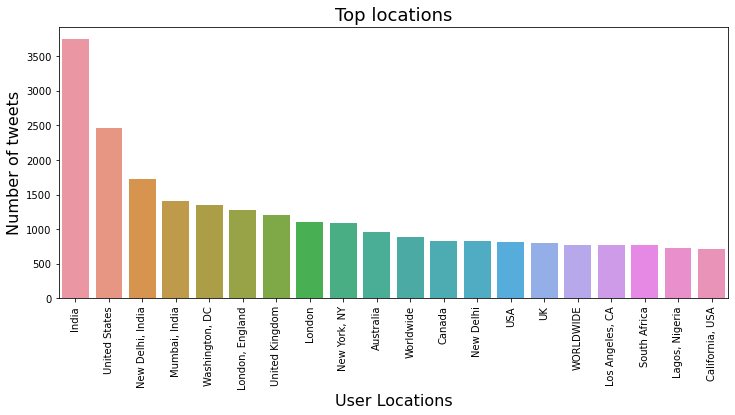

In [7]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(data=top_locations,x=top_locations['user_location'], y=top_locations['counts'])
ax.set_xticklabels(top_locations['user_location'], rotation=90)

plt.title("Top locations", fontsize=18)
plt.xlabel("User Locations", fontsize=16)
plt.ylabel("Number of tweets", fontsize=16)

In [8]:
source_count = covid.groupby('source')[['user_name']].count()
source_count = source_count.sort_values(by="user_name").tail(10).reset_index()
source_count

source  user_name
0                IFTTT       1545
1            Instagram       1759
2        Sprout Social       1833
3               Buffer       2728
4     Twitter for iPad       4336
5       Hootsuite Inc.       7321
6            TweetDeck       8543
7   Twitter for iPhone      35472
8  Twitter for Android      40179
9      Twitter Web App      56891

Text(0.5, 1.0, 'Top 10 sources of highest tweet')

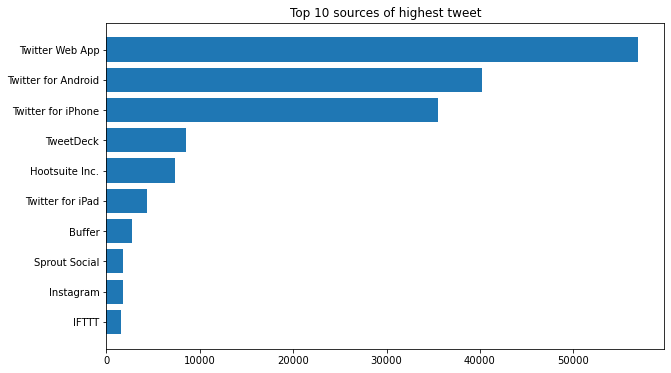

In [9]:
fig = plt.figure(figsize=(10,6))
plt.barh(data=source_count, y="source", width="user_name")
plt.title("Top 10 sources of highest tweet")

In [10]:
fig = px.histogram(covid[(covid["user_followers"]>0) & (covid["user_followers"]<=15000)],x="user_followers", nbins=10,
                   title="Distribution of user followers with user followers less than 15000")
fig.show()

In [15]:
new = covid[['user_name', 'user_followers']].copy()
new = new.drop_duplicates(subset = ['user_name'])

new = new.sort_values(by = ['user_followers'], ascending = False)
new15 = new.head(15)
new15

user_name  user_followers
104946                              CNN        49442559
174909              National Geographic        24359165
235                                CGTN        13892795
1161                               NDTV        13417047
785                  The Times Of India        12978547
3872                     United Nations        12748145
3251                  China Xinhua News        12681122
105719                CNN International        11081219
129519                            WIRED        10380131
13557                          ABP News        10172489
47268                      Ivanka Trump         9222125
16615                            UNICEF         8334203
47022   World Health Organization (WHO)         8158987
2020                    Hindustan Times         7647627
9337                     Shashi Tharoor         7634361

Text(0.5, 1.0, 'Top 15 Twitter usernames by follower count')

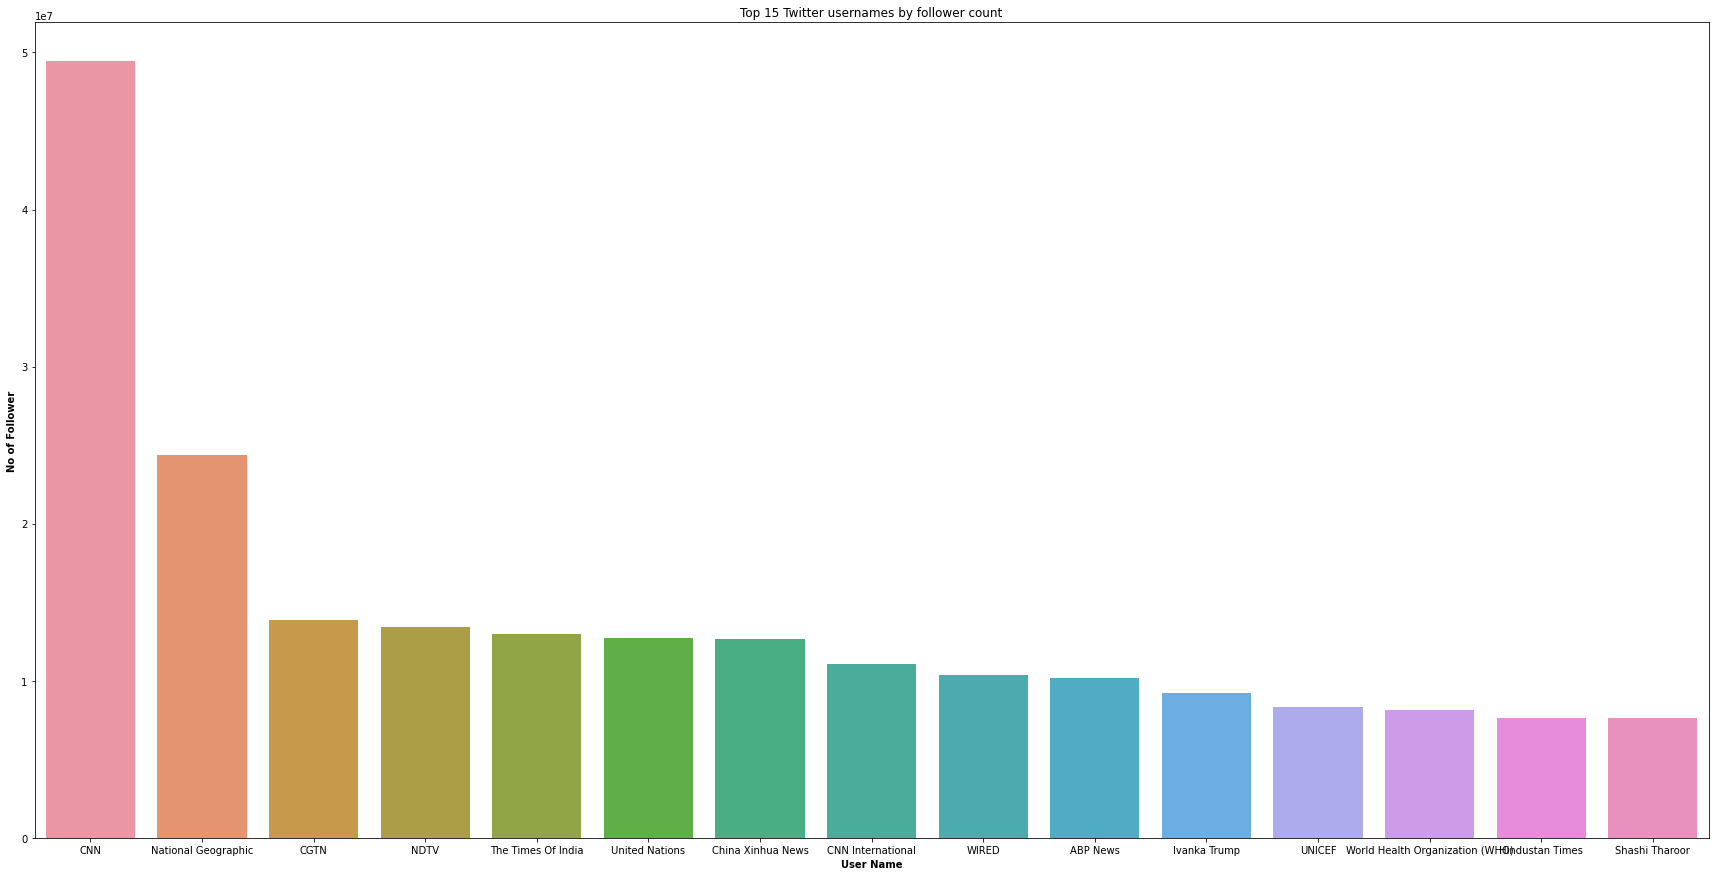

In [17]:
plt.figure(figsize = (30,15))
sns.barplot(x = 'user_name', y = 'user_followers', data = new15)
plt.xlabel('User Name', fontweight = 'bold')
plt.ylabel('No of Follower', fontweight = 'bold')
plt.title('Top 15 Twitter usernames by follower count')